# Import libraries

In [3]:
import os
import math
import functools as F

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as pd


In [8]:
%%bash
# pip -q install --upgrade --no-cache-dir gdown
gdown -q 1Do8SXKm4rmXW-phHlejV-udLfhSyYgKk
echo 'download: done => file: animals10small.zip'
rm -rf ./animals10small/
unzip -q animals10small.zip
echo 'Data files in: /content/animals10small/'

download: done => file: animals10small.zip
Data files in: /content/animals10small/


In [9]:
!rm -f bbc-fulltext.zip
!rm -rf bbc 
!wget http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip
!unzip -q bbc-fulltext.zip

--2025-12-18 07:01:19--  http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip
Resolving mlg.ucd.ie (mlg.ucd.ie)... 137.43.93.132
Connecting to mlg.ucd.ie (mlg.ucd.ie)|137.43.93.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874079 (2.7M) [application/zip]
Saving to: ‘bbc-fulltext.zip’

bbc-fulltext.zip    100%[===================>]   2.74M  1.53MB/s    in 1.8s    

2025-12-18 07:01:22 (1.53 MB/s) - ‘bbc-fulltext.zip’ saved [2874079/2874079]



# Q.1 - Show arrays's attributes
* Requirements:
  * Fill code to the following code cells, after **#YOUR CODE IS HERE**, to show the arrays' attributes as shown in the output followed.
  

In [ ]:
X = np.array([10, 20, 5, 15, 8])
#YOUR CODE IS HERE

print(f"Type of X, type(X): {type(X)}")
print(f"Shape of X, X.shape: {X.shape}")
print(f"Element's type, X.dtype: {X.dtype}")
print(f"Number of dimension, X.ndim: {X.ndim}")


Type of X, type(X): <class 'numpy.ndarray'>
Shape of X, X.shape: (5,)
Element's type, X.dtype: int64
Number of dimension, X.dims: 1


In [15]:
X = np.array([
    [10, 20, 3],
    [2, 2, 8]
])

print(f"Type of X, type(X): {type(X)}")
print(f"Shape of X, X.shape: {X.shape}")
print(f"Element's type, X.dtype: {X.dtype}")
print(f"Num of dimensions, X.ndim: {X.ndim}")



Type of X, type(X): <class 'numpy.ndarray'>
Shape of X, X.shape: (2, 3)
Element's type, X.dtype: int64
Num of dimensions, X.ndim: 2


# Q.2- Create arrays from lists | **Dataset: animals10small**

In [16]:
# RUN THIS CELL TO CREATE LIST OF THE ANIMAL'S NAME
path_to_data = './animals10small/data'
class_names = sorted([fname for fname in os.listdir(path_to_data) if not fname.startswith('.')])
print("List of the animal's names:\n", class_names)

class_counts = [ len(list(filter(lambda name: name.endswith(".jpg") or name.endswith(".jpeg"),
                                os.listdir(os.path.join(path_to_data, cname))
                                )
                          )
                    )
                for cname in class_names]  
print("Number of files for each animal:\n", class_counts)         

List of the animal's names:
 ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']
Number of files for each animal:
 [95, 100, 100, 100, 100, 96, 100, 100, 100, 100]


## Q2.1- Create an array of the animal's names:
* Requirements:
  * Fill code to the following code cells, after #YOUR CODE IS HERE, to create an array of the animals' name shown in the output followed.


In [17]:
# YOUR CODE IS HERE
idx2class = np.array(['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel'])
print("Array of the animal's name:")
print(f"Type of idx2class, type(idx2class): {type(idx2class)}")
print(f"Shape of idx2class, idx2class.shape: {idx2class.shape}")
print(f"Element's type, idx2class.dtype.type: {idx2class.dtype.type}")
print(f"Num of dimensions, idx2class.ndim: {idx2class.ndim}")
print("Animal's name:, idx2class:")
print(idx2class)

Array of the animal's name:
Type of idx2class, type(idx2class): <class 'numpy.ndarray'>
Shape of idx2class, idx2class.shape: (10,)
Element's type, idx2class.dtype.type: <class 'numpy.str_'>
Num of dimensions, idx2class.ndim: 1
Animal's name:, idx2class:
['butterfly' 'cat' 'chicken' 'cow' 'dog' 'elephant' 'horse' 'sheep'
 'spider' 'squirrel']


## Q2.2- Create an array of the animal's counts:
* Requirements:
  * Fill code to the following code cells, after #YOUR CODE IS HERE, to create an array of the animals' counts shown in the output followed.

In [18]:
# YOUR CODE IS HERE
class_counts = np.array(class_counts)

print(f"type(class_counts): {type(class_counts)}")
print(f"class_count.shape: {class_counts.shape}")
print(f"class_counts.dtype: {class_counts.dtype}")
print(f"class_counts: {class_counts}")



type(class_counts): <class 'numpy.ndarray'>
class_count.shape: (10,)
class_counts.dtype: int64
class_counts: [ 95 100 100 100 100  96 100 100 100 100]


## Q.2.3- Visualize the classes' distribution

### Q.2.3.1 Sample code
The cell followed contains code to show the distribution of fruits.

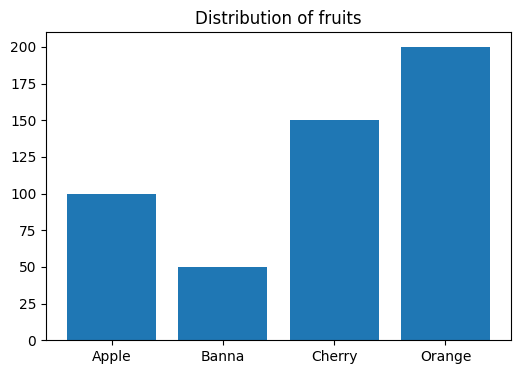

In [19]:
values = np.array([100, 50, 150, 200])
labels = ["Apple", "Banna", "Cherry", "Orange"]

plt.figure(figsize=(6,4))
plt.bar(height=values, x=labels)
plt.title("Distribution of fruits")
plt.show()

### Q.2.3.2 Question
Fill code into the cell followed, after **#YOUR CODE IS HERE** to show the distribution of animals, as shown in the output cell followed

[ 95 100 100 100 100  96 100 100 100 100]


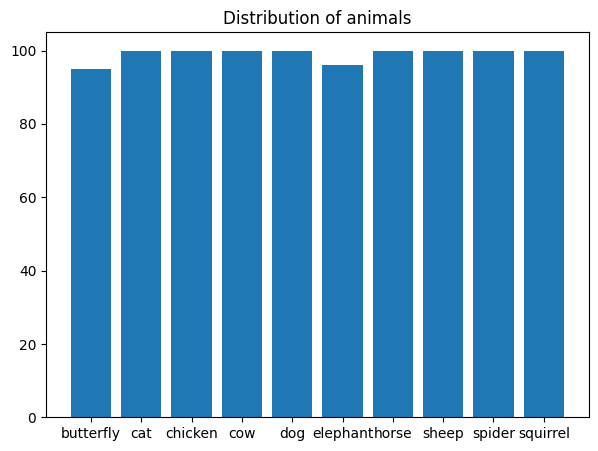

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(height=class_counts, x=class_names)
plt.title("Distribution of animals")
plt.show()


# Q.3- Create arrays from lists | **Dataset: BBC News**
* Requirements:
  * Fill code to the following cell to collect all the classes' name stored in variable **path_to_data**
    * NOTE-1: class-names are sub-folders of the folder specified in **path_to_data**
    * NOTE-2: your have to sort the classes' names ascendingly by alphabet-order
* Guideline:
  * Copy the idea from Section 2.
  * You can use ``os.path.isdir(name)`` to verify whether ``name`` a directory or not 
  * You filter file names that ends with ".txt" instead of ".jpg" or ".jpeg" in Dataset **animals10small**


In [30]:
path_to_data = './bbc'

class_names_bbc = np.array([x for x in os.listdir(path_to_data) if os.path.isdir(os.path.join(path_to_data, x))])

list_total_files = []
for x in class_names_bbc: 
    valid_path = os.path.join(path_to_data, x)
    number_of_file = []
    for x in os.listdir(valid_path):
        valid_path_file = os.path.join(valid_path, x)
        if os.path.isfile(valid_path_file):
            number_of_file.append(x)
    list_total_files.append(len(number_of_file))

class_counts_bbc = np.array(list_total_files)

print("List of the classes' name:")
print(class_names_bbc)
print("Number of files for each class:")
print(class_counts_bbc)

List of the classes' name:
['business' 'sport' 'entertainment' 'tech' 'politics']
Number of files for each class:
[510 511 386 401 417]


## Q3.1- Create an array of classes' name:
* Requirements:
  * Fill code to the following code cells, after #YOUR CODE IS HERE, to create an array of the classes' name shown in the output followed.


In [31]:
print("Array of the classes' names:")
print(f"Type of idx2class, type(idx2class): {type(class_counts_bbc)}")
print(f"Shape of idx2class, idx2class.shape: {class_counts_bbc.shape}")
print(f"Element's type, idx2class.dtype.type: {class_counts_bbc.dtype.type}")
print(f"Num of dimensions, idx2class.ndim: {class_counts_bbc.ndim}")
print(f"Classes' names:, idx2class:")
print(class_names_bbc)



Array of the classes' names:
Type of idx2class, type(idx2class): <class 'numpy.ndarray'>
Shape of idx2class, idx2class.shape: (5,)
Element's type, idx2class.dtype.type: <class 'numpy.int64'>
Num of dimensions, idx2class.ndim: 1
Classes' names:, idx2class:
['business' 'sport' 'entertainment' 'tech' 'politics']


## Q2.2- Create an array of the classes' counts:
* Requirements:
  * Fill code to the following code cells, after #YOUR CODE IS HERE, to create an array of the classes' counts shown in the output followed.

In [32]:
print(f"type(class_counts): {type(class_counts_bbc)}")
print(f"class_counts.shape: {class_counts_bbc.shape}")
print(f"class_counts.dtype: {class_counts_bbc.dtype}")
print(f"class_counts: {class_counts_bbc}")


type(class_counts): <class 'numpy.ndarray'>
class_counts.shape: (5,)
class_counts.dtype: int64
class_counts: [510 511 386 401 417]


## Q.3.3- Visualize the distribution of news's type
Fill code into the cell followed, after **#YOUR CODE IS HERE** to show the distribution of news's type, as shown in the output cell followed

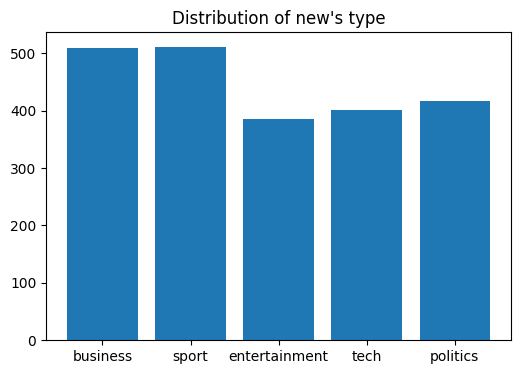

In [33]:
plt.figure(figsize=(6,4))
plt.bar(height=class_counts_bbc, x=class_names_bbc)
plt.title("Distribution of new's type")
plt.show()

# Q.4 - Explore a dataset
* Introduction to the dataset:
  * Name: Flower
  * Link: [https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz](https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz)
* Requrements:
  1. Download the dataset into your machine: use ``wget`` (see Section 0). You will have a file: **flower_photos.tgz**
  2. Decompress **flower_photos.tgz** to using command: ``tar -xzf flower_photos.tgz``
  3. Determine ``class_names`` and ``class_counts``, similar to Section 2 and 3.
  4. Show the class distribution

* Guideline:
  * Create sub-sections similar to Section 2 and 3 for your solutions

In [34]:
# YOUR CODE IS HERE

!rm -f flower_photos.tgz
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
!tar -xzf flower_photos.tgz
path_to_data = './flower_photos'

--2025-12-18 07:27:33--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.71.219, 142.250.71.251, 142.250.198.123, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.71.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M  5.52MB/s    in 41s     

2025-12-18 07:28:12 (5.32 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



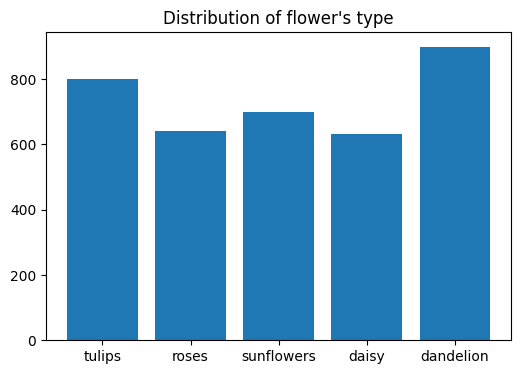

In [37]:
path_to_data = './flower_photos'

class_names_flower = np.array([x for x in os.listdir(path_to_data) if os.path.isdir(os.path.join(path_to_data, x))])

count_list = []

for x in class_names_flower:
    valid_name_path = os.path.join(path_to_data, x)
    list_file = []
    for i in os.listdir(valid_name_path):
        valid_file_path = os.path.join(valid_name_path, i)
        if os.path.isfile(valid_file_path):
            list_file.append(i)
    count_list.append(len(list_file))

class_counts_flower = np.array(count_list)

plt.figure(figsize=(6,4))
plt.bar(height=class_counts_flower, x=class_names_flower)
plt.title("Distribution of flower's type")
plt.show()
